<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = 'datasets/sacramento_real_estate_transactions.csv'

In [12]:
# A:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(sac_csv)

In [13]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [6]:
# A:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [14]:
df['city'].unique()
df['state'].unique() #typo AC change to CA

df['state']='CA'

In [15]:
df['state'].unique()

array(['CA'], dtype=object)

In [16]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

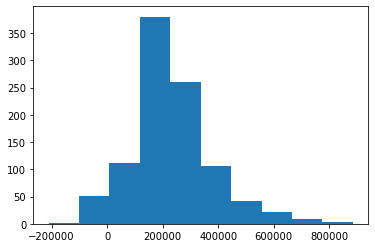

In [17]:
#par(mfrow=c(1,2))
plt.hist(df.price);

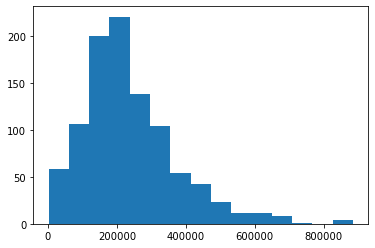

In [18]:
#drop negative & 0 price
df = df[(df.price>0)]
plt.hist(df.price,bins=15);

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [19]:
df['zip'] = df['zip'].astype('string')

In [20]:
df.dtypes

street        object
city          object
zip           string
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [51]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
baths        0.416225
beds         0.342152
sq__ft       0.333861
longitude    0.284472
latitude    -0.039506
zip         -0.093232
Name: price, dtype: float64

The price tends to increase when the finished sqft, the number of beds and the number of bathrooms go up.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

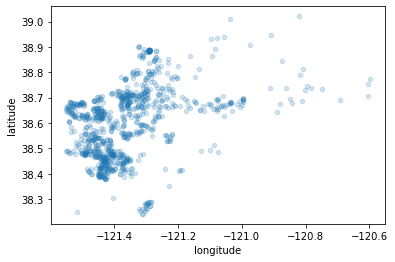

In [22]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
#plt.savefig('map1.png')

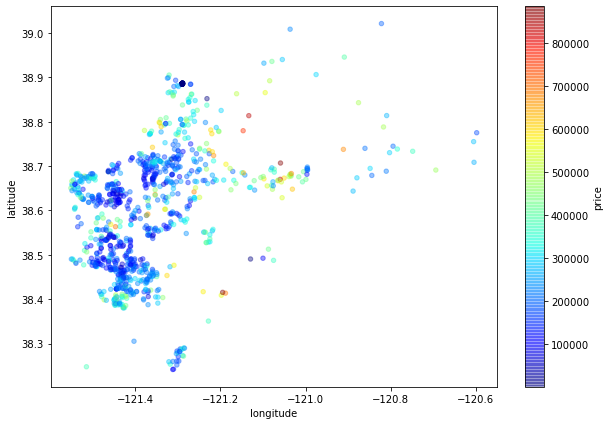

In [23]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('latlongpricemap2.png')

Houses in the north are sold for higher prices. 

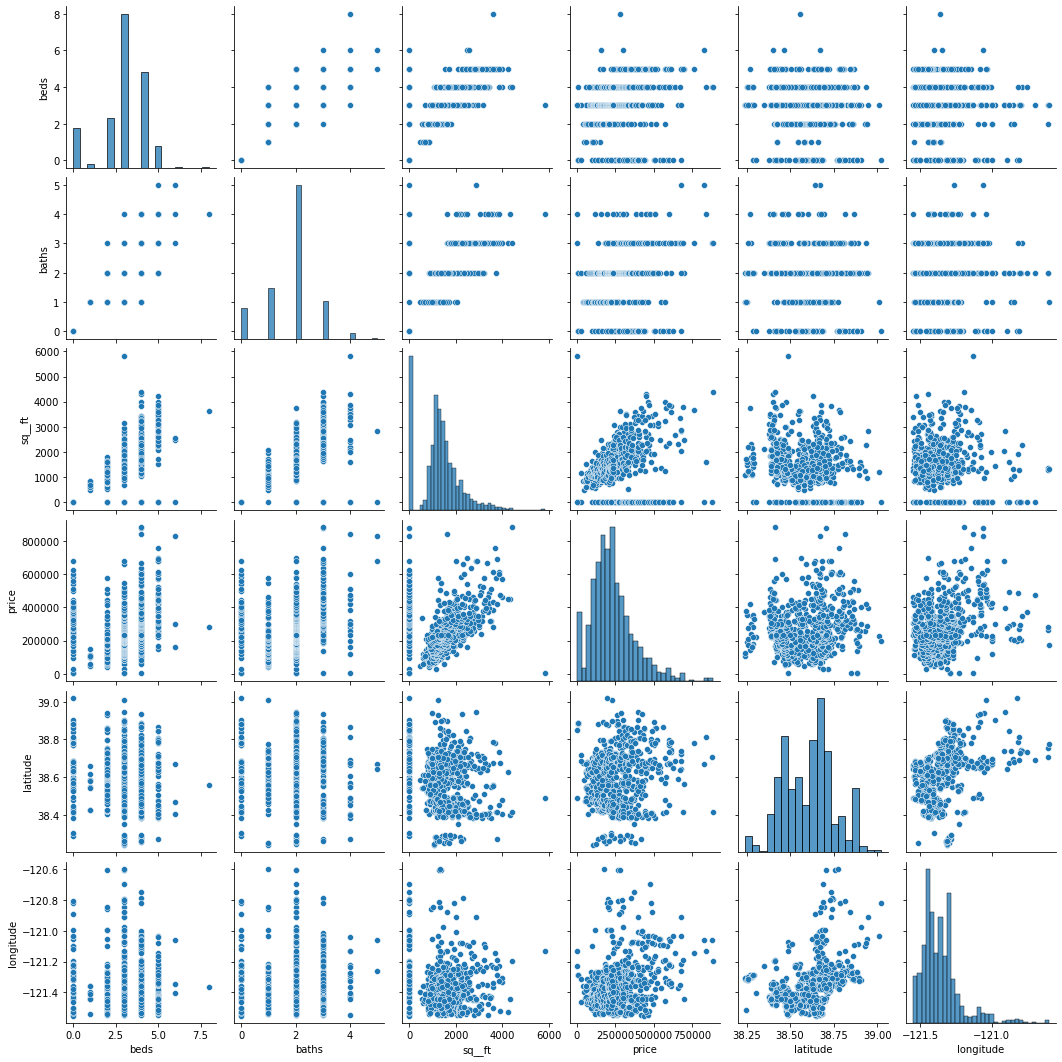

In [24]:
sns.pairplot(df)

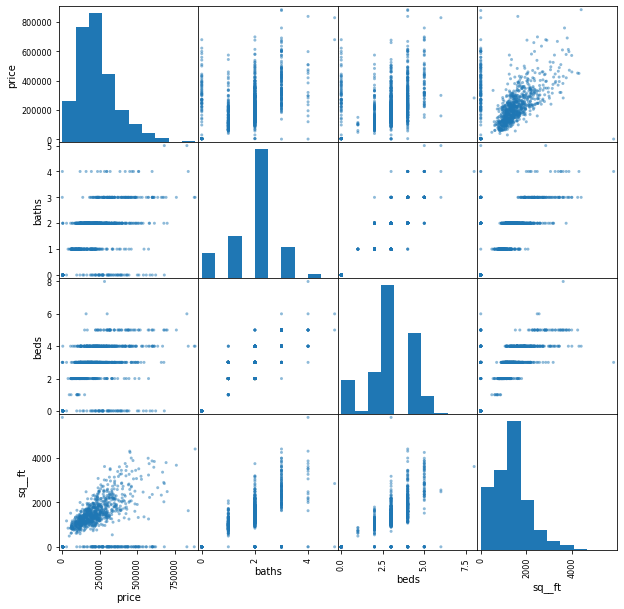

In [55]:
pd.plotting.scatter_matrix(df[['price','baths','beds','sq__ft']],figsize=(10,10));

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

# A:
1. beds
2. sq_ft
3. type
4. baths
5. sale_date

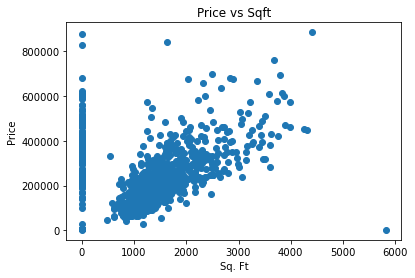

In [56]:
plt.scatter(x=df['sq__ft'], y=df['price']);
plt.xlabel('Sq. Ft')
plt.ylabel('Price')
plt.title('Price vs Sqft');

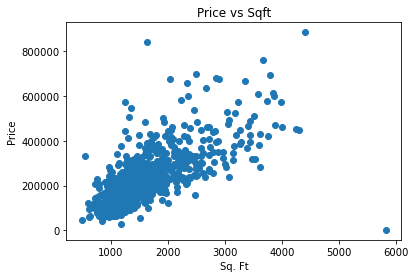

In [25]:
#drop 0 sqft and 
df = df[(df.sq__ft > 0)]

plt.scatter(x=df['sq__ft'], y=df['price']);
plt.xlabel('Sq. Ft')
plt.ylabel('Price')
plt.title('Price vs Sqft');

<AxesSubplot:title={'center':'price'}, xlabel='sale_date'>

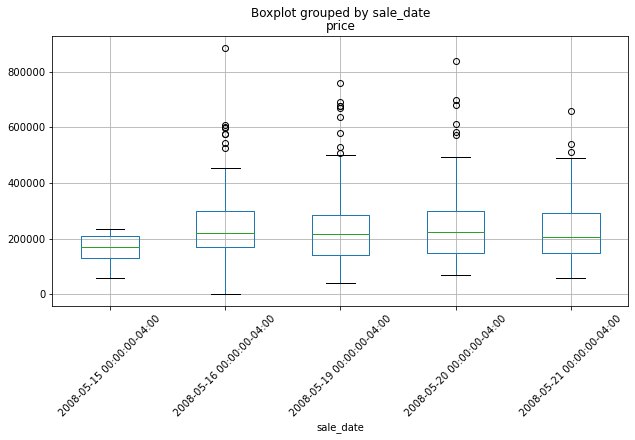

In [11]:
df['sale_date']= pd.to_datetime(df['sale_date'])

df.boxplot(column='price', by='sale_date',figsize =(10,5),rot=45)

In [12]:
df['beds'].unique()
df['baths'].unique()

df['beds'] = df['beds'].astype('string')
df['baths'] = df['baths'].astype('string')

<AxesSubplot:title={'center':'price'}, xlabel='baths'>

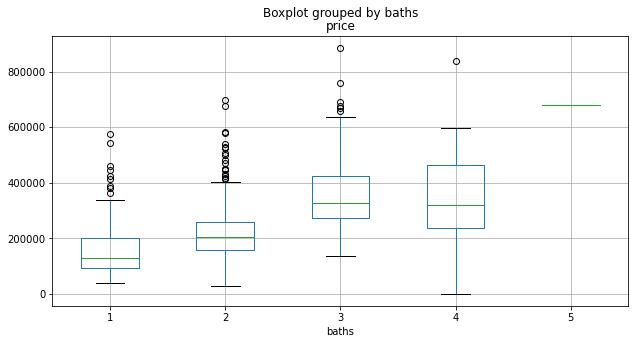

In [13]:
df.boxplot(column='price', by='baths',figsize =(10,5))


<AxesSubplot:title={'center':'price'}, xlabel='beds'>

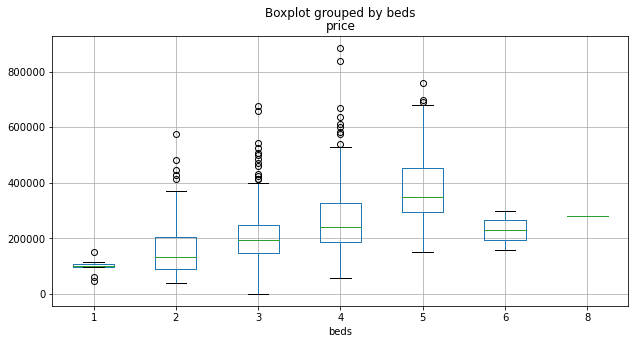

In [14]:
#df.plot(kind="box", x="beds", y="price", title='Price vs Beds')
#plt.savefig('box.png')
df.boxplot(column='price', by='beds',figsize =(10,5))

<AxesSubplot:title={'center':'price'}, xlabel='type'>

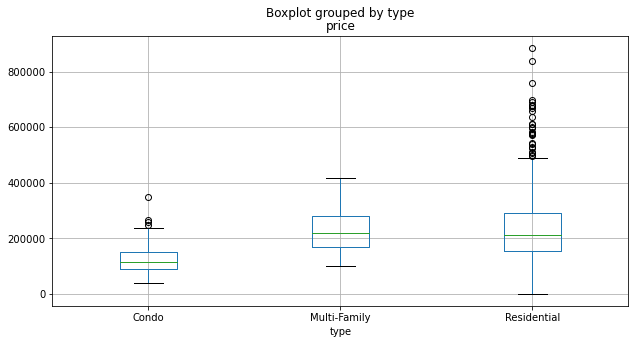

In [15]:
df.boxplot(column='price', by='type',figsize =(10,5))

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# A:
sqft

most obvious linear relationship

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [16]:
import numpy as np
import scipy.stats as stats

In [17]:
# A:

def line_of_best_fit(X, y):

    # Calculate the five "ingredients."
    y_bar = np.mean(y)
    X_bar = np.mean(X)
    std_y = np.std(y)
    std_X = np.std(X)
    r_xy = np.corrcoef(X, y)[0][1]
    #r_xy = stats.pearsonr(X, y)[0]
    print(np.corrcoef(X,y))
    # Calculate the betas.
    beta_1 = r_xy*(std_y/std_X)
    beta_0 = y_bar-beta_1*X_bar

    # Return line of best fit.
    print("Intercept Coefficient: {}".format(beta_0))
    print("Slope Coefficient: {}".format(beta_1))
    return beta_0+beta_1*X

In [18]:
df['Linear_Yhat']=line_of_best_fit(X=df['sq__ft'], y=df['price'])

[[1.         0.69390169]
 [0.69390169 1.        ]]
Intercept Coefficient: 29984.361726519797
Slope Coefficient: 125.3141825751014


In [20]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Linear_Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,134747.018359
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,176226.012792
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,129734.451056
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,136752.045281
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,129859.765239


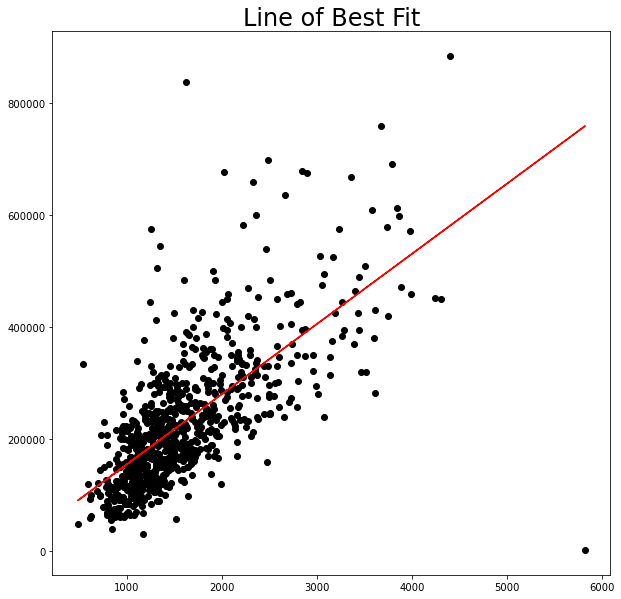

In [29]:
from matplotlib.patches import Ellipse

from matplotlib.text import OffsetFrom

# Create a figure.
plt.figure(figsize=(10,10))

# Generate a scatterplot of our data.
plt.scatter(df['sq__ft'],
            df['price'],
            color = 'black')

# Also generate a line for our prediction.
plt.plot(df['sq__ft'],
         df['Linear_Yhat'],
         color = 'red')

#plt.annotate('Line of Best Fit',xy=(2, 1), xycoords='data',xytext=(-15, 25), textcoords='offset points')

# Create a title.
plt.title('Line of Best Fit', fontsize = 24);

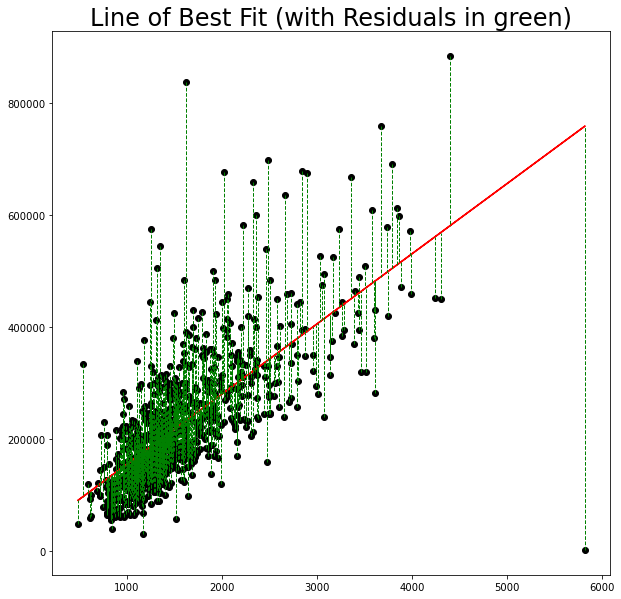

In [31]:
# Create a figure.
plt.figure(figsize=(10,10))

# Generate a scatterplot of our data.
plt.scatter(df['sq__ft'],
            df['price'],
            color='black')

# Also generate a line for our prediction.
plt.plot(df['sq__ft'],
         df['Linear_Yhat'],
         color='red')

# Iterate over our DataFrame, plotting a dashed line 
# from each observed value to its predicted value.
# Code originally written by Marc Harper.
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']),
             (row['price'], row['Linear_Yhat']),
             color = 'green',
             linestyle = '--',
             lw=1)
    
# Create a title.
plt.title('Line of Best Fit (with Residuals in green)', fontsize = 24);

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
y = df['price'] # y = what we want to predict #target
X = df[['sq__ft']]

regressor=LinearRegression()
regressor.fit(X,y)

y_pred=regressor.predict(X)


In [25]:
regressor.intercept_

29984.361726519768

In [26]:
regressor.coef_

array([125.31418258])

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:
I interpret  𝛽̂0 by saying If the sq_ft is zero, then I expect the price of that sale to be $29984.
I interpret  𝛽̂1 by saying As the sq_ft of a sale increases by one unit, then I expect the price of that sale to increase by $125"

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [27]:
# A:
residuals=y-y_pred

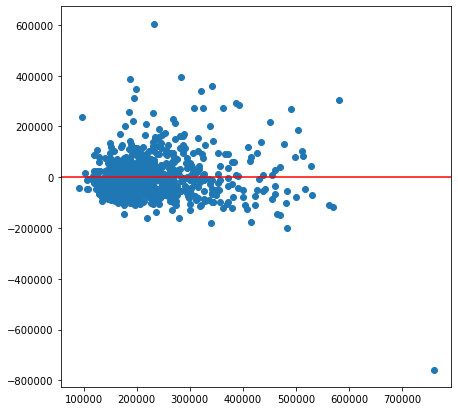

In [28]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,residuals)
plt.axhline(0,color='r')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [72]:
# A:
types_df = pd.get_dummies(df['type'])

types_df=types_df.drop(['Unkown'],axis=1)

In [73]:
types_df.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [74]:
types_df.drop('Multi-Family', axis=1, inplace=True)

In [75]:
types_df

,Condo,Residential
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
980,0,1
981,0,1
982,0,1
983,0,1


In [76]:
df = df.merge(types_df,left_index=True, right_index=True)

In [77]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [78]:
# A:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [83]:
y = df['price']
X = df[['beds','baths','sq__ft','Condo','Residential']]

regressor.fit(X,y)
y_pred=regressor.predict(X)

regressor.score(X,y)

0.4919323552037267

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

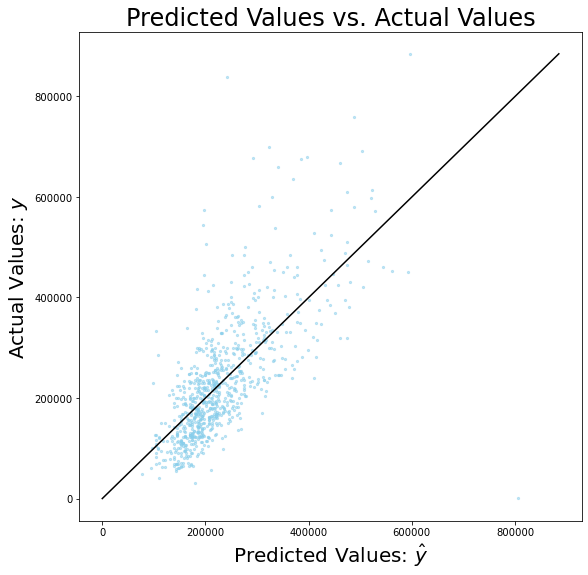

In [84]:
# A:

# Plot the model
plt.figure(figsize=(9,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [43]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression

In [39]:
# A:
def r2_adj(X, y):
     
    regressor = LinearRegression()
    model = regressor.fit(X, y)
    
    r_squared = regressor.score(X, y)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    print("Adjusted R-squared: {}".format(adj_r_squared))

In [40]:
r2_adj(X, y)

Adjusted R-squared: 0.4887844763636011


### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [44]:
# A:

def regression_metrics(X, y):

    
    regressor = LinearRegression()
    model = regressor.fit(X, y)
    y_hat = regressor.predict(X)

    r_squared = regressor.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

In [45]:
regression_metrics(X, y)

R-squared: 0.4919323552037267
Adjusted R-squared: 0.4887844763636011
Mean Squared Error: 7294706697.527724
Root Mean Squared Error: 85409.05512606801
Mean Absolute Error: 59088.86475088256
Median Absolute Error: 46366.27609007637


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [87]:
df['zip'].unique()

<StringArray>
['95838', '95823', '95815', '95824', '95841', '95842', '95820', '95670',
 '95673', '95822', '95621', '95833', '95660', '95834', '95843', '95832',
 '95827', '95828', '95758', '95626', '95825', '95835', '95624', '95632',
 '95826', '95608', '95662', '95630', '95829', '95655', '95757', '95726',
 '95818', '95742', '95683', '95693', '95831', '95814', '95635', '95864',
 '95817', '95628', '95667', '95610', '95722', '95816', '95678', '95747',
 '95648', '95819', '95811', '95682', '95765', '95661', '95650', '95821',
 '95603', '95762', '95677', '95623', '95663', '95746', '95619', '95614',
 '95690', '95691']
Length: 66, dtype: string

In [88]:
zips_df = pd.get_dummies(df['zip'])

In [89]:
zips_df.drop('95691', axis=1, inplace=True)
df = df.merge(zips_df, left_index=True, right_index=True)

In [90]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,95831,95832,95833,95834,95835,95838,95841,95842,95843,95864
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,0,0,0,1,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,0,0,0,0,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,0,0,0,0,0,0,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,0,0,0,0,0,0,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,0,0,0,0,0,0,0,0,0,0


In [91]:
zips_df.columns.unique()

Index(['95603', '95608', '95610', '95614', '95619', '95621', '95623', '95624',
       '95626', '95628', '95630', '95632', '95635', '95648', '95650', '95655',
       '95660', '95661', '95662', '95663', '95667', '95670', '95673', '95677',
       '95678', '95682', '95683', '95690', '95693', '95722', '95726', '95742',
       '95746', '95747', '95757', '95758', '95762', '95765', '95811', '95814',
       '95815', '95816', '95817', '95818', '95819', '95820', '95821', '95822',
       '95823', '95824', '95825', '95826', '95827', '95828', '95829', '95831',
       '95832', '95833', '95834', '95835', '95838', '95841', '95842', '95843',
       '95864'],
      dtype='object')

In [103]:
# A:
y = df['price']
X = df[['beds','baths','sq__ft','Condo','Residential','95603', '95608', '95610', '95614', '95619', '95621', '95623', '95624',
       '95626', '95628', '95630', '95632', '95635', '95648', '95650', '95655',
       '95660', '95661', '95662', '95663', '95667', '95670', '95673', '95677',
       '95678', '95682', '95683', '95690', '95693', '95722', '95726', '95742',
       '95746', '95747', '95757', '95758', '95762', '95765', '95811', '95814',
       '95815', '95816', '95817', '95818', '95819', '95820', '95821', '95822',
       '95823', '95824', '95825', '95826', '95827', '95828', '95829', '95831',
       '95832', '95833', '95834', '95835', '95838', '95841', '95842', '95843',
       '95864']]

regressor.fit(X,y)
y_pred=regressor.predict(X)

regressor.score(X,y)

0.7185684383887021

In [104]:
regression_metrics(X, y)

R-squared: 0.7185684383887021
Adjusted R-squared: 0.6920182910668815
Mean Squared Error: 4040723156.470285
Root Mean Squared Error: 63566.68275496437
Mean Absolute Error: 44438.31013154311
Median Absolute Error: 32563.464062704938


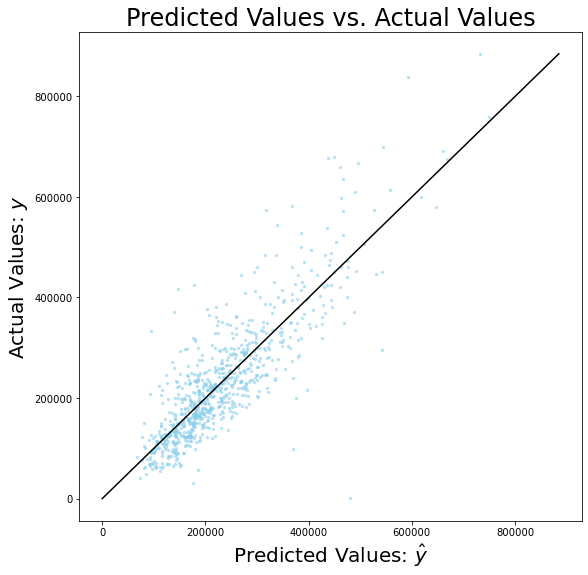

In [105]:
plt.figure(figsize=(9,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [94]:
df['day_of_week'] = [d[0:3] for d in df['sale_date']]

In [96]:
day_of_week_df = pd.get_dummies(df['day_of_week'])

In [97]:
day_of_week_df.drop('Wed', axis=1, inplace=True)

In [98]:
df = df.merge(day_of_week_df, left_index=True, right_index=True)

In [101]:
y = df['price']
X = df[['beds','baths','sq__ft','Condo','Residential', 'Mon', 'Thu', 'Tue']]

regressor.fit(X,y)
y_pred=regressor.predict(X)

print(regressor.score(X,y))

regression_metrics(X, y)

0.5029905918466161
R-squared: 0.5029905918466161
Adjusted R-squared: 0.49804522460130873
Mean Squared Error: 7135935333.659282
Root Mean Squared Error: 84474.46557190688
Mean Absolute Error: 58837.73731224154
Median Absolute Error: 47702.00804418724


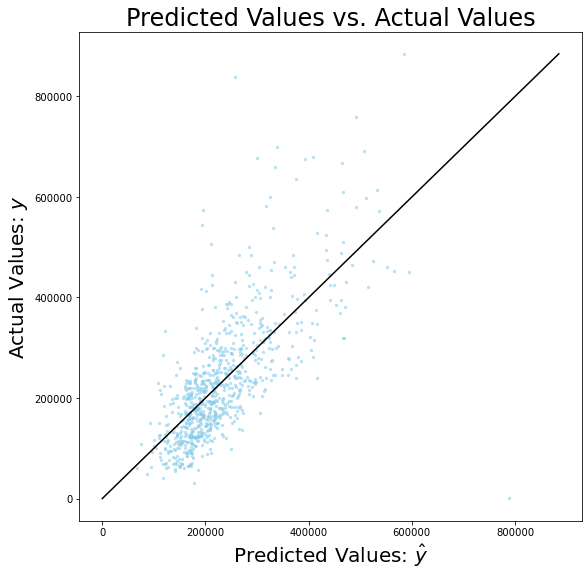

In [102]:
plt.figure(figsize=(9,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A:
by increasing complexity, R^2 is improved. hence it's biased. 